# #1-4

In [172]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import scipy.stats as stats

import statsmodels.api as sm


%matplotlib inline

# #5

In [173]:
#reading in gdp df
gdp_df = pd.read_csv("../data/gdp_per_capita.csv")

In [174]:
#dropping the last two rows of footnotes
gdp_df.drop(gdp_df.tail(2).index,inplace=True)

# #6

In [175]:
#dropping the 'Value Footnotes' Column
gdp_df = gdp_df.drop('Value Footnotes', axis = 1)

In [176]:
#renaming remaining columns
gdp_df.rename(columns = {"Country or Area": "Country"},  
          inplace = True) 
gdp_df.rename(columns = {"Value":"GDP_Per_Capita"},  
          inplace = True) 

# #7

In [177]:
#Seeing how many roles and columns are in the gdp_df
gdp_df.shape

(6729, 3)

In [178]:
#checking data types
gdp_df.dtypes

Country            object
Year               object
GDP_Per_Capita    float64
dtype: object

In [179]:
#Fixing the data type of 'Year'
gdp_df['Year'] = gdp_df['Year'].astype(int)

In [180]:
#checking that I fixed the data types
gdp_df.dtypes

Country            object
Year                int32
GDP_Per_Capita    float64
dtype: object

# #8

In [181]:
#Seeing which years are represented and how many observations per year there are
gdp_df['Year'].value_counts().sort_index()
#Obs per year: Increases until 2011 then starts to decrease. A drop off in 2018.

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

# #9

In [182]:
gdp_df['Country'].describe()

count        6729
unique        243
top       Myanmar
freq           29
Name: Country, dtype: object

In [183]:
#Taking a look at countries with most and least observations
gdp_df.Country.value_counts()
#The countries w/ least observations might have recenlt joined the UN or have recently become a country

Myanmar                                               29
Dominican Republic                                    29
Jamaica                                               29
Tuvalu                                                29
Mexico                                                29
Pre-demographic dividend                              29
Lao PDR                                               29
Malawi                                                29
Dem. Rep. Congo                                       29
Honduras                                              29
Slovenia                                              29
Dominica                                              29
New Zealand                                           29
Upper middle income                                   29
Belarus                                               29
Lower middle income                                   29
North Macedonia                                       29
Saudi Arabia                   

# #10

In [184]:
#Making a new df by subsetting to year 2014
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

# #11

In [185]:
#looking at summary statistic for new df
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


# #12

Text(0.5, 1.0, 'GDP Per Capita in 2014')

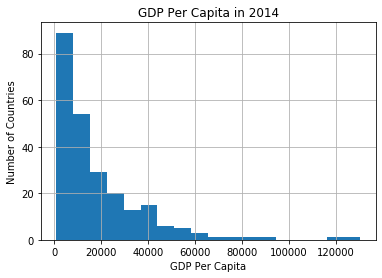

In [186]:
#Creating a Histogram of GDP Per Capita in 2014
gdp_2014['GDP_Per_Capita'].hist(bins = 18)
plt.xlabel('GDP Per Capita')
plt.ylabel('Number of Countries')
plt.title('GDP Per Capita in 2014')
#Looks like half of a normal distribution that got cut off at zero. Skewed to the right. Mean higher than median.

# #13

In [187]:
#Top 5 and Bottom 5 in 2014
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
4199,Mozambique,2014,1222.452874
3460,Liberia,2014,1257.625441
1799,Ethiopia,2014,1413.962518
6063,Togo,2014,1423.553002
2321,Guinea-Bissau,2014,1425.770644


# #14

In [188]:
#first making a df with just data from 1990 and 2017
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]


In [189]:
#pivoting the 1990,2017 data set and dropping na
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country',columns = 'Year').dropna()

# #15

In [190]:
#creating a new column of 'Percent_Change'
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

# #16

In [191]:
#Finding countries with a negative percent change
gdp_pivoted_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]
gdp_pivoted_negative_sorted = gdp_pivoted_negative.sort_values(by=['Percent_Change'])
#20 countries had a negative percent change in GDP from 1990 to 2017
gdp_pivoted_negative_sorted

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
Central African Republic,982.659793,746.434942,-24.039332
Venezuela,14619.454190,11489.648818,-21.408497
Tajikistan,3661.340213,2923.673718,-20.147445
Haiti,2061.842854,1653.001460,-19.828931


# #17

In [192]:
#Finding Countries with highest % change in GDP form 1990 to 2017
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted

Year,1990,2017,Percent_Change
Country,,,
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629
China,1521.963868,15253.993071,902.257241
Equatorial Guinea,1017.764136,22298.942144,2090.973464


In [193]:
#Taking a closer look at EG (had highest % increase)
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']
gdp_df_eq_guin.head()

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748


In [194]:
#Taking a closer look at China (had second highest % increase)
gdp_df_china = gdp_df[gdp_df['Country']=='China']
gdp_df_china.head()

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099


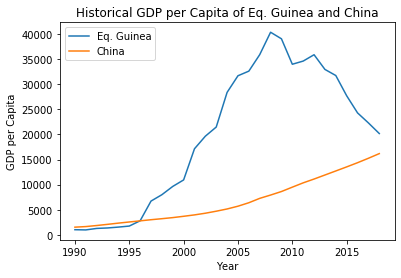

In [195]:
#Creating a Line PLot for EQ and China GDP growth
plt.plot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'], label = 'Eq. Guinea')
plt.plot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'], label = 'China')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Historical GDP per Capita of Eq. Guinea and China')
plt.legend()

# #18

In [196]:
#reading in continents df
continents = pd.read_csv("../data/continents.csv")

# #19

In [197]:
#merging gdp df and continents df
gdp_df = gdp_df.merge(continents, how = 'inner', on = 'Country')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


# #20

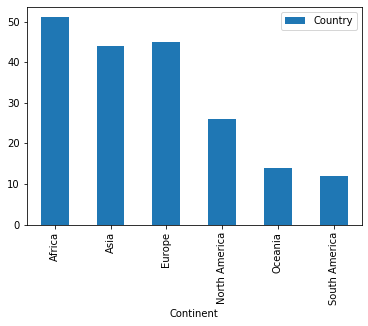

In [198]:
gdp_df.groupby('Continent').agg({'Country':'nunique'}).plot(kind = 'bar')

# #21

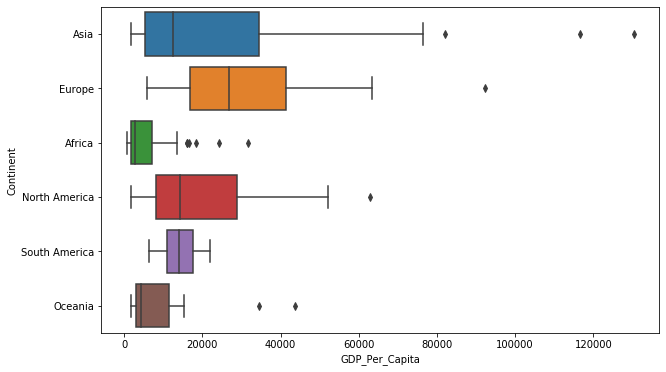

In [199]:
plt.figure(figsize = (10,6))
sns.boxplot(data = gdp_df[gdp_df['Year'] == 2014], x = 'GDP_Per_Capita', y = 'Continent')

# #22

In [200]:
#reading in internet df
internet_df = pd.read_csv("../data/internet_use.csv", error_bad_lines = False, skipfooter = 181, engine = 'python')
internet_df.tail()

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


# #23

In [201]:
internet_df = internet_df.drop('Value Footnotes', axis = 1)

In [202]:
internet_df = internet_df.rename(columns = {'Country or Area' : 'Country','Value':'Internet_Users_Pct' })
internet_df


,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


# #24

In [203]:
internet_df.shape

(4495, 3)

In [204]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [205]:
internet_df.describe()

,Year,Internet_Users_Pct
count,4495.000000,4495.000000
mean,2002.732814,18.675495
std,7.856270,25.091999
min,1960.000000,0.000000
25%,1998.000000,0.346593
50%,2003.000000,5.265683
75%,2009.000000,30.581020
max,2014.000000,98.160000


# #25

In [206]:
internet_df[internet_df['Internet_Users_Pct']>0].sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


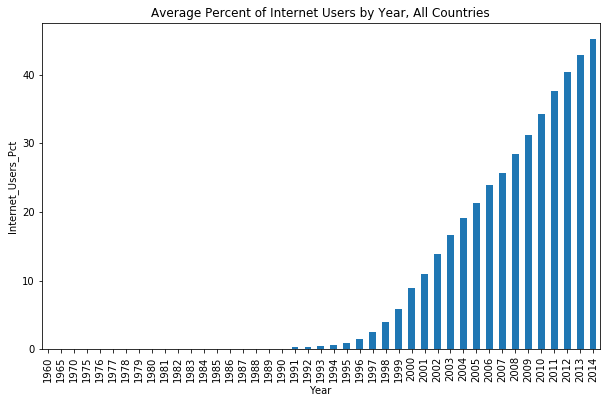

In [207]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind = 'bar', figsize=(10,6))
plt.title('Average Percent of Internet Users by Year, All Countries')
plt.ylabel('Internet_Users_Pct');

### 1990 is the first year that an internet users percentage reported.

# #26

In [208]:
#Bonus
gdp_and_internet_use_outer = gdp_df.merge(internet_df, on = ['Country','Year'], how = 'outer')

In [209]:
pd.options.display.max_rows = 999
gdp_and_internet_use.groupby('Country').count()


,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
Country,,,,
Afghanistan,13,13,13,13
Albania,21,21,21,21
Algeria,22,22,22,22
Angola,20,20,20,20
Antigua and Barbuda,21,21,21,21
Argentina,24,24,24,24
Armenia,22,22,22,22
Aruba,18,18,18,18
Australia,22,22,22,22


In [38]:
#merging gdp_df and internet_df
gdp_and_internet_use = gdp_df.merge(internet_df, on = ['Country','Year'])

In [103]:
internet_df.head()

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000


# #27

In [39]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [40]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


# #28

In [41]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [42]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00


In [43]:
gdp_and_internet_use_2014['Internet_Users_Pct'].agg(['mean'])

mean    44.673536
Name: Internet_Users_Pct, dtype: float64

In [44]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>90]

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
228,Bahrain,2014,43846.568554,Asia,90.99998
854,Denmark,2014,45057.083449,Europe,95.99000
1067,Finland,2014,39301.058763,Europe,92.38000
1395,Iceland,2014,42774.888849,Europe,98.16000
1578,Japan,2014,37337.317406,Asia,90.58000
1812,Luxembourg,2014,92349.186429,Europe,94.67000
2199,Netherlands,2014,46238.209707,Europe,93.17000
2310,Norway,2014,63328.259526,Europe,96.30000
2556,Qatar,2014,116693.507701,Asia,91.49000
2992,Sweden,2014,44762.490296,Europe,92.52000


In [45]:
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

### 12 countries have at least 90% internet users in 2014

# #29

In [46]:
gdp_and_internet_use_2014.sort_values(by = 'GDP_Per_Capita', ascending = False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [48]:
gdp_and_internet_use_2014_top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar','Luxembourg','Singapore'])]

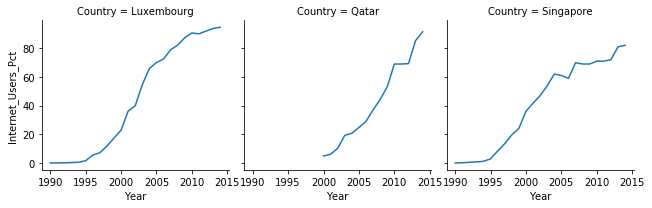

In [60]:
g = sns.FacetGrid(gdp_and_internet_use_2014_top3, col = "Country" )
g.map_dataframe(sns.lineplot, "Year", 'Internet_Users_Pct')
plt.show()

# #30

Text(0.5, 1.0, '"GDP Per Capita" vs "Internet Users %"')

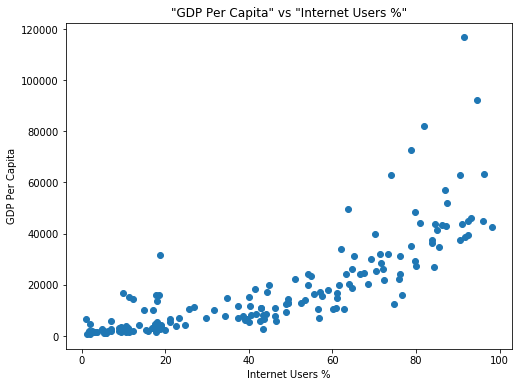

In [76]:
plt.figure(figsize = (8,6))
plt.scatter(x = gdp_and_internet_use_2014['Internet_Users_Pct'], y = gdp_and_internet_use_2014['GDP_Per_Capita'])
plt.xlabel('Internet Users %')
plt.ylabel('GDP Per Capita')
plt.title('"GDP Per Capita" vs "Internet Users %"')


# #31

In [81]:
np.corrcoef(gdp_and_internet_use_2014['Internet_Users_Pct'],gdp_and_internet_use_2014['GDP_Per_Capita'])

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

### The Correlation Coefficient is 0.788 which is high level of correlation.

# #32

In [87]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log'] = np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

C:\Users\savro\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita_Log'],gdp_and_internet_use_2014['GDP_Per_Capita'])

array([[1.        , 0.84829949],
       [0.84829949, 1.        ]])

# #33

In [93]:
gdp_internet_us = gdp_and_internet_use[gdp_and_internet_use['Country'] == 'United States']

In [101]:
np.corrcoef(gdp_and_internet_use_2014['GDP_Per_Capita'], gdp_and_internet_use_2014['Internet_Users_Pct'])

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

### From the USA it has a very strong correlation of 0.9916. This could be meaningful, but more research would need to be done.